In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
# from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

Matplotlib is building the font cache; this may take a moment.


In [2]:
df = pd.read_csv('Processed_RUSSELL.csv')

In [3]:
df.head()

,Date,Close,Volume,mom,mom1,mom2,mom3,ROC_5,ROC_10,ROC_15,...,NZD,silver-F,RUSSELL-F,S&P-F,CHF,Dollar index-F,Dollar index,wheat-F,XAG,XAU
0,2009-12-31,625.390015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.03,0.26,-1.08,-1.00,-0.11,-0.08,-0.06,-0.48,0.30,0.39
1,2010-01-04,640.099976,0.921723,0.023521,NaN,NaN,NaN,NaN,NaN,NaN,...,1.52,3.26,1.61,1.62,-0.57,-0.59,-0.42,3.12,3.91,2.10
2,2010-01-05,638.489990,-0.375903,-0.002515,0.023521,NaN,NaN,NaN,NaN,NaN,...,-0.07,1.96,-0.20,0.31,0.43,0.03,0.12,-0.90,1.42,-0.12
3,2010-01-06,637.950012,0.996234,-0.000846,-0.002515,0.023521,NaN,NaN,NaN,NaN,...,0.56,2.15,-0.02,0.07,-0.56,-0.24,-0.17,2.62,2.25,1.77
4,2010-01-07,641.969971,0.059932,0.006301,-0.000846,-0.002515,0.023521,NaN,NaN,NaN,...,-0.72,0.94,0.50,0.40,0.58,0.58,0.54,-1.85,0.22,-0.58


In [4]:
df.dtypes

Date               object
Close             float64
Volume            float64
mom               float64
mom1              float64
                   ...   
Dollar index-F    float64
Dollar index      float64
wheat-F           float64
XAG               float64
XAU               float64
Length: 84, dtype: object

In [692]:
df.shape

(1984, 84)

In [693]:
df.describe()

,Close,Volume,mom,mom1,mom2,mom3,ROC_5,ROC_10,ROC_15,ROC_20,...,NZD,silver-F,RUSSELL-F,S&P-F,CHF,Dollar index-F,Dollar index,wheat-F,XAG,XAU
count,1984.000000,1983.000000,1983.000000,1982.000000,1981.000000,1980.000000,1979.000000,1974.000000,1969.000000,1964.000000,...,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1982.000000,1984.000000,1984.000000
mean,1018.599466,0.020292,0.000511,0.000513,0.000515,0.000515,0.248217,0.489019,0.741984,0.999259,...,-0.001507,-0.047314,0.063634,0.043674,-0.002268,0.010726,0.010338,-0.014743,0.010418,0.010025
std,243.220270,0.234049,0.012767,0.012769,0.012772,0.012775,2.685003,3.530575,4.347954,4.893268,...,0.752757,1.944127,1.254398,0.942540,0.742651,0.483800,0.495002,1.935339,1.832492,1.027910
min,586.489990,-0.830978,-0.089095,-0.089095,-0.089095,-0.089095,-17.896192,-21.703151,-20.680251,-22.584400,...,-4.120000,-17.750000,-7.540000,-7.220000,-15.760000,-2.390000,-4.280000,-11.060000,-12.930000,-8.490000
25%,799.520019,-0.085167,-0.005690,-0.005693,-0.005696,-0.005699,-1.247495,-1.564681,-1.793903,-1.992222,...,-0.450000,-0.952500,-0.570000,-0.342500,-0.340000,-0.270000,-0.270000,-1.190000,-0.840000,-0.520000
50%,1074.595032,-0.001709,0.000997,0.001003,0.001008,0.001011,0.400616,0.536703,0.962537,1.316188,...,-0.010000,-0.030000,0.120000,0.060000,0.000000,0.010000,0.000000,-0.085000,0.030000,0.020000
75%,1195.702515,0.089797,0.007504,0.007505,0.007506,0.007510,1.835914,2.815861,3.448016,4.099304,...,0.470000,0.930000,0.740000,0.500000,0.350000,0.280000,0.280000,1.067500,0.920000,0.570000
max,1512.089966,4.424133,0.069436,0.069436,0.069436,0.069436,12.372645,13.189669,20.761627,21.586902,...,3.430000,12.810000,7.390000,5.440000,9.680000,2.180000,3.980000,12.310000,6.530000,4.800000


In [694]:
df.head()

,Date,Close,Volume,mom,mom1,mom2,mom3,ROC_5,ROC_10,ROC_15,...,NZD,silver-F,RUSSELL-F,S&P-F,CHF,Dollar index-F,Dollar index,wheat-F,XAG,XAU
0,2009-12-31,625.390015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.03,0.26,-1.08,-1.00,-0.11,-0.08,-0.06,-0.48,0.30,0.39
1,2010-01-04,640.099976,0.921723,0.023521,NaN,NaN,NaN,NaN,NaN,NaN,...,1.52,3.26,1.61,1.62,-0.57,-0.59,-0.42,3.12,3.91,2.10
2,2010-01-05,638.489990,-0.375903,-0.002515,0.023521,NaN,NaN,NaN,NaN,NaN,...,-0.07,1.96,-0.20,0.31,0.43,0.03,0.12,-0.90,1.42,-0.12
3,2010-01-06,637.950012,0.996234,-0.000846,-0.002515,0.023521,NaN,NaN,NaN,NaN,...,0.56,2.15,-0.02,0.07,-0.56,-0.24,-0.17,2.62,2.25,1.77
4,2010-01-07,641.969971,0.059932,0.006301,-0.000846,-0.002515,0.023521,NaN,NaN,NaN,...,-0.72,0.94,0.50,0.40,0.58,0.58,0.54,-1.85,0.22,-0.58


In [695]:
df.isnull().sum()

Date              0
Close             0
Volume            1
mom               1
mom1              2
                 ..
Dollar index-F    0
Dollar index      0
wheat-F           2
XAG               0
XAU               0
Length: 84, dtype: int64

In [696]:
null = df.isna().sum().head(30)
print("Number of null values in the dataset are: ", null)


Number of null values in the dataset are:  Date         0
Close        0
Volume       1
mom          1
mom1         2
mom2         3
mom3         4
ROC_5        5
ROC_10      10
ROC_15      15
ROC_20      20
EMA_10       9
EMA_20      19
EMA_50      49
EMA_200    199
DTB4WK       0
DTB3         0
DTB6         0
DGS5         0
DGS10        0
Oil          1
Gold         1
DAAA         0
DBAA         0
GBP        478
JPY        479
CAD        483
CNY        479
AAPL         1
AMZN         1
dtype: int64


In [697]:
# Extract Volume column
volume_data = df[['Volume']].copy()

In [698]:
df_clean = df.dropna(axis=1, how='any')

In [699]:
df_clean.head()

,Date,Close,DTB4WK,DTB3,DTB6,DGS5,DGS10,DAAA,DBAA,TE1,...,Nikkei-F,NZD,silver-F,RUSSELL-F,S&P-F,CHF,Dollar index-F,Dollar index,XAG,XAU
0,2009-12-31,625.390015,0.04,0.06,0.20,2.69,3.85,5.33,6.39,3.81,...,0.67,0.03,0.26,-1.08,-1.00,-0.11,-0.08,-0.06,0.30,0.39
1,2010-01-04,640.099976,0.05,0.08,0.18,2.65,3.85,5.35,6.39,3.80,...,0.31,1.52,3.26,1.61,1.62,-0.57,-0.59,-0.42,3.91,2.10
2,2010-01-05,638.489990,0.03,0.07,0.17,2.56,3.77,5.24,6.30,3.74,...,0.47,-0.07,1.96,-0.20,0.31,0.43,0.03,0.12,1.42,-0.12
3,2010-01-06,637.950012,0.03,0.06,0.15,2.60,3.85,5.30,6.34,3.82,...,0.19,0.56,2.15,-0.02,0.07,-0.56,-0.24,-0.17,2.25,1.77
4,2010-01-07,641.969971,0.02,0.05,0.16,2.62,3.85,5.31,6.33,3.83,...,-0.09,-0.72,0.94,0.50,0.40,0.58,0.58,0.54,0.22,-0.58


In [700]:
# Merge Volume back
df_clean = pd.concat([df_clean, volume_data], axis=1)

In [701]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1984 entries, 0 to 1983
Data columns (total 40 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            1984 non-null   object 
 1   Close           1984 non-null   float64
 2   DTB4WK          1984 non-null   float64
 3   DTB3            1984 non-null   float64
 4   DTB6            1984 non-null   float64
 5   DGS5            1984 non-null   float64
 6   DGS10           1984 non-null   float64
 7   DAAA            1984 non-null   float64
 8   DBAA            1984 non-null   float64
 9   TE1             1984 non-null   float64
 10  TE2             1984 non-null   float64
 11  TE3             1984 non-null   float64
 12  TE5             1984 non-null   float64
 13  TE6             1984 non-null   float64
 14  DE1             1984 non-null   float64
 15  DE2             1984 non-null   float64
 16  DE4             1984 non-null   float64
 17  DE5             1984 non-null   f

In [702]:
df_clean1 =df_clean.drop(['Name'] , axis=1)

In [703]:
df_clean1.head(20)

,Date,Close,DTB4WK,DTB3,DTB6,DGS5,DGS10,DAAA,DBAA,TE1,...,NZD,silver-F,RUSSELL-F,S&P-F,CHF,Dollar index-F,Dollar index,XAG,XAU,Volume
0,2009-12-31,625.390015,0.04,0.06,0.20,2.69,3.85,5.33,6.39,3.81,...,0.03,0.26,-1.08,-1.00,-0.11,-0.08,-0.06,0.30,0.39,NaN
1,2010-01-04,640.099976,0.05,0.08,0.18,2.65,3.85,5.35,6.39,3.80,...,1.52,3.26,1.61,1.62,-0.57,-0.59,-0.42,3.91,2.10,0.921723
2,2010-01-05,638.489990,0.03,0.07,0.17,2.56,3.77,5.24,6.30,3.74,...,-0.07,1.96,-0.20,0.31,0.43,0.03,0.12,1.42,-0.12,-0.375903
3,2010-01-06,637.950012,0.03,0.06,0.15,2.60,3.85,5.30,6.34,3.82,...,0.56,2.15,-0.02,0.07,-0.56,-0.24,-0.17,2.25,1.77,0.996234
4,2010-01-07,641.969971,0.02,0.05,0.16,2.62,3.85,5.31,6.33,3.83,...,-0.72,0.94,0.50,0.40,0.58,0.58,0.54,0.22,-0.58,0.059932
5,2010-01-08,644.559998,0.02,0.05,0.15,2.57,3.83,5.32,6.32,3.81,...,0.61,0.68,0.64,0.35,-0.98,-0.58,-0.56,1.26,0.38,-0.167168
6,2010-01-11,643.989990,0.01,0.04,0.13,2.58,3.85,5.35,6.32,3.84,...,0.64,-0.13,-1.01,0.09,-0.66,-0.64,-0.61,0.65,1.44,-0.030483
7,2010-01-12,635.500000,0.02,0.05,0.14,2.49,3.74,5.25,6.22,3.72,...,-0.47,-2.36,-0.67,-0.74,0.22,-0.05,-0.06,-1.78,-2.19,0.108178
8,2010-01-13,643.559998,0.02,0.06,0.15,2.55,3.80,5.32,6.30,3.78,...,0.26,1.62,0.82,0.66,-0.15,-0.17,-0.13,1.97,0.98,-0.115730
9,2010-01-14,646.429993,0.02,0.05,0.14,2.51,3.76,5.17,6.22,3.74,...,0.27,0.57,0.76,0.33,0.12,-0.13,-0.16,0.32,0.39,-0.061184


In [704]:
df_clean1.isna().sum().head(70)


Date              0
Close             0
DTB4WK            0
DTB3              0
DTB6              0
DGS5              0
DGS10             0
DAAA              0
DBAA              0
TE1               0
TE2               0
TE3               0
TE5               0
TE6               0
DE1               0
DE2               0
DE4               0
DE5               0
DE6               0
AUD               0
Brent             0
copper-F          0
WIT-oil           0
DJI-F             0
EUR               0
gold-F            0
NASDAQ-F          0
GAS-F             0
Nikkei-F          0
NZD               0
silver-F          0
RUSSELL-F         0
S&P-F             0
CHF               0
Dollar index-F    0
Dollar index      0
XAG               0
XAU               0
Volume            1
dtype: int64

In [705]:
df_clean1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1984 entries, 0 to 1983
Data columns (total 39 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            1984 non-null   object 
 1   Close           1984 non-null   float64
 2   DTB4WK          1984 non-null   float64
 3   DTB3            1984 non-null   float64
 4   DTB6            1984 non-null   float64
 5   DGS5            1984 non-null   float64
 6   DGS10           1984 non-null   float64
 7   DAAA            1984 non-null   float64
 8   DBAA            1984 non-null   float64
 9   TE1             1984 non-null   float64
 10  TE2             1984 non-null   float64
 11  TE3             1984 non-null   float64
 12  TE5             1984 non-null   float64
 13  TE6             1984 non-null   float64
 14  DE1             1984 non-null   float64
 15  DE2             1984 non-null   float64
 16  DE4             1984 non-null   float64
 17  DE5             1984 non-null   f

In [706]:
df_clean1['Date'] = pd.DataFrame({
    'Date': df_clean1['Date'] 
})

In [707]:

# Convert the 'Date' column to datetime
df_clean1['Date'] = pd.to_datetime(df_clean1['Date'])

In [708]:
df_clean1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1984 entries, 0 to 1983
Data columns (total 39 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            1984 non-null   datetime64[ns]
 1   Close           1984 non-null   float64       
 2   DTB4WK          1984 non-null   float64       
 3   DTB3            1984 non-null   float64       
 4   DTB6            1984 non-null   float64       
 5   DGS5            1984 non-null   float64       
 6   DGS10           1984 non-null   float64       
 7   DAAA            1984 non-null   float64       
 8   DBAA            1984 non-null   float64       
 9   TE1             1984 non-null   float64       
 10  TE2             1984 non-null   float64       
 11  TE3             1984 non-null   float64       
 12  TE5             1984 non-null   float64       
 13  TE6             1984 non-null   float64       
 14  DE1             1984 non-null   float64       
 15  DE2 

In [709]:
# Extract time-based features to improve analysis or model performance.



# Extract features directly from the column
df_clean1['Day'] = df_clean1['Date'].dt.day
df_clean1['Month'] = df_clean1['Date'].dt.month
df_clean1['Year'] = df_clean1['Date'].dt.year

In [710]:
df_clean1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1984 entries, 0 to 1983
Data columns (total 42 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            1984 non-null   datetime64[ns]
 1   Close           1984 non-null   float64       
 2   DTB4WK          1984 non-null   float64       
 3   DTB3            1984 non-null   float64       
 4   DTB6            1984 non-null   float64       
 5   DGS5            1984 non-null   float64       
 6   DGS10           1984 non-null   float64       
 7   DAAA            1984 non-null   float64       
 8   DBAA            1984 non-null   float64       
 9   TE1             1984 non-null   float64       
 10  TE2             1984 non-null   float64       
 11  TE3             1984 non-null   float64       
 12  TE5             1984 non-null   float64       
 13  TE6             1984 non-null   float64       
 14  DE1             1984 non-null   float64       
 15  DE2 

In [711]:
df_clean1.head()

,Date,Close,DTB4WK,DTB3,DTB6,DGS5,DGS10,DAAA,DBAA,TE1,...,S&P-F,CHF,Dollar index-F,Dollar index,XAG,XAU,Volume,Day,Month,Year
0,2009-12-31,625.390015,0.04,0.06,0.20,2.69,3.85,5.33,6.39,3.81,...,-1.00,-0.11,-0.08,-0.06,0.30,0.39,NaN,31,12,2009
1,2010-01-04,640.099976,0.05,0.08,0.18,2.65,3.85,5.35,6.39,3.80,...,1.62,-0.57,-0.59,-0.42,3.91,2.10,0.921723,4,1,2010
2,2010-01-05,638.489990,0.03,0.07,0.17,2.56,3.77,5.24,6.30,3.74,...,0.31,0.43,0.03,0.12,1.42,-0.12,-0.375903,5,1,2010
3,2010-01-06,637.950012,0.03,0.06,0.15,2.60,3.85,5.30,6.34,3.82,...,0.07,-0.56,-0.24,-0.17,2.25,1.77,0.996234,6,1,2010
4,2010-01-07,641.969971,0.02,0.05,0.16,2.62,3.85,5.31,6.33,3.83,...,0.40,0.58,0.58,0.54,0.22,-0.58,0.059932,7,1,2010


In [712]:
df_clean['Volume'] = df_clean['Volume'].ffill()  # Forward fill


In [713]:
df_clean1.head()

,Date,Close,DTB4WK,DTB3,DTB6,DGS5,DGS10,DAAA,DBAA,TE1,...,S&P-F,CHF,Dollar index-F,Dollar index,XAG,XAU,Volume,Day,Month,Year
0,2009-12-31,625.390015,0.04,0.06,0.20,2.69,3.85,5.33,6.39,3.81,...,-1.00,-0.11,-0.08,-0.06,0.30,0.39,NaN,31,12,2009
1,2010-01-04,640.099976,0.05,0.08,0.18,2.65,3.85,5.35,6.39,3.80,...,1.62,-0.57,-0.59,-0.42,3.91,2.10,0.921723,4,1,2010
2,2010-01-05,638.489990,0.03,0.07,0.17,2.56,3.77,5.24,6.30,3.74,...,0.31,0.43,0.03,0.12,1.42,-0.12,-0.375903,5,1,2010
3,2010-01-06,637.950012,0.03,0.06,0.15,2.60,3.85,5.30,6.34,3.82,...,0.07,-0.56,-0.24,-0.17,2.25,1.77,0.996234,6,1,2010
4,2010-01-07,641.969971,0.02,0.05,0.16,2.62,3.85,5.31,6.33,3.83,...,0.40,0.58,0.58,0.54,0.22,-0.58,0.059932,7,1,2010


In [714]:
# Backfilling the volume to sort the nan first value

df_clean1['Volume'] = df_clean1['Volume'].bfill()

In [715]:
df_clean1.isna().sum()


Date              0
Close             0
DTB4WK            0
DTB3              0
DTB6              0
DGS5              0
DGS10             0
DAAA              0
DBAA              0
TE1               0
TE2               0
TE3               0
TE5               0
TE6               0
DE1               0
DE2               0
DE4               0
DE5               0
DE6               0
AUD               0
Brent             0
copper-F          0
WIT-oil           0
DJI-F             0
EUR               0
gold-F            0
NASDAQ-F          0
GAS-F             0
Nikkei-F          0
NZD               0
silver-F          0
RUSSELL-F         0
S&P-F             0
CHF               0
Dollar index-F    0
Dollar index      0
XAG               0
XAU               0
Volume            0
Day               0
Month             0
Year              0
dtype: int64

In [716]:
# Example: Convert "Day" to categorical (if treating it as a category)
df_clean1['Day'] = df_clean1['Day'].astype('category')

In [717]:
print("Duplicate rows:", df_clean1.duplicated().sum())

Duplicate rows: 0


In [718]:
print("Duplicate dates:", df_clean['Date'].duplicated().sum())

Duplicate dates: 0


In [719]:
df_clean1.drop(columns=['Date'], inplace=True)


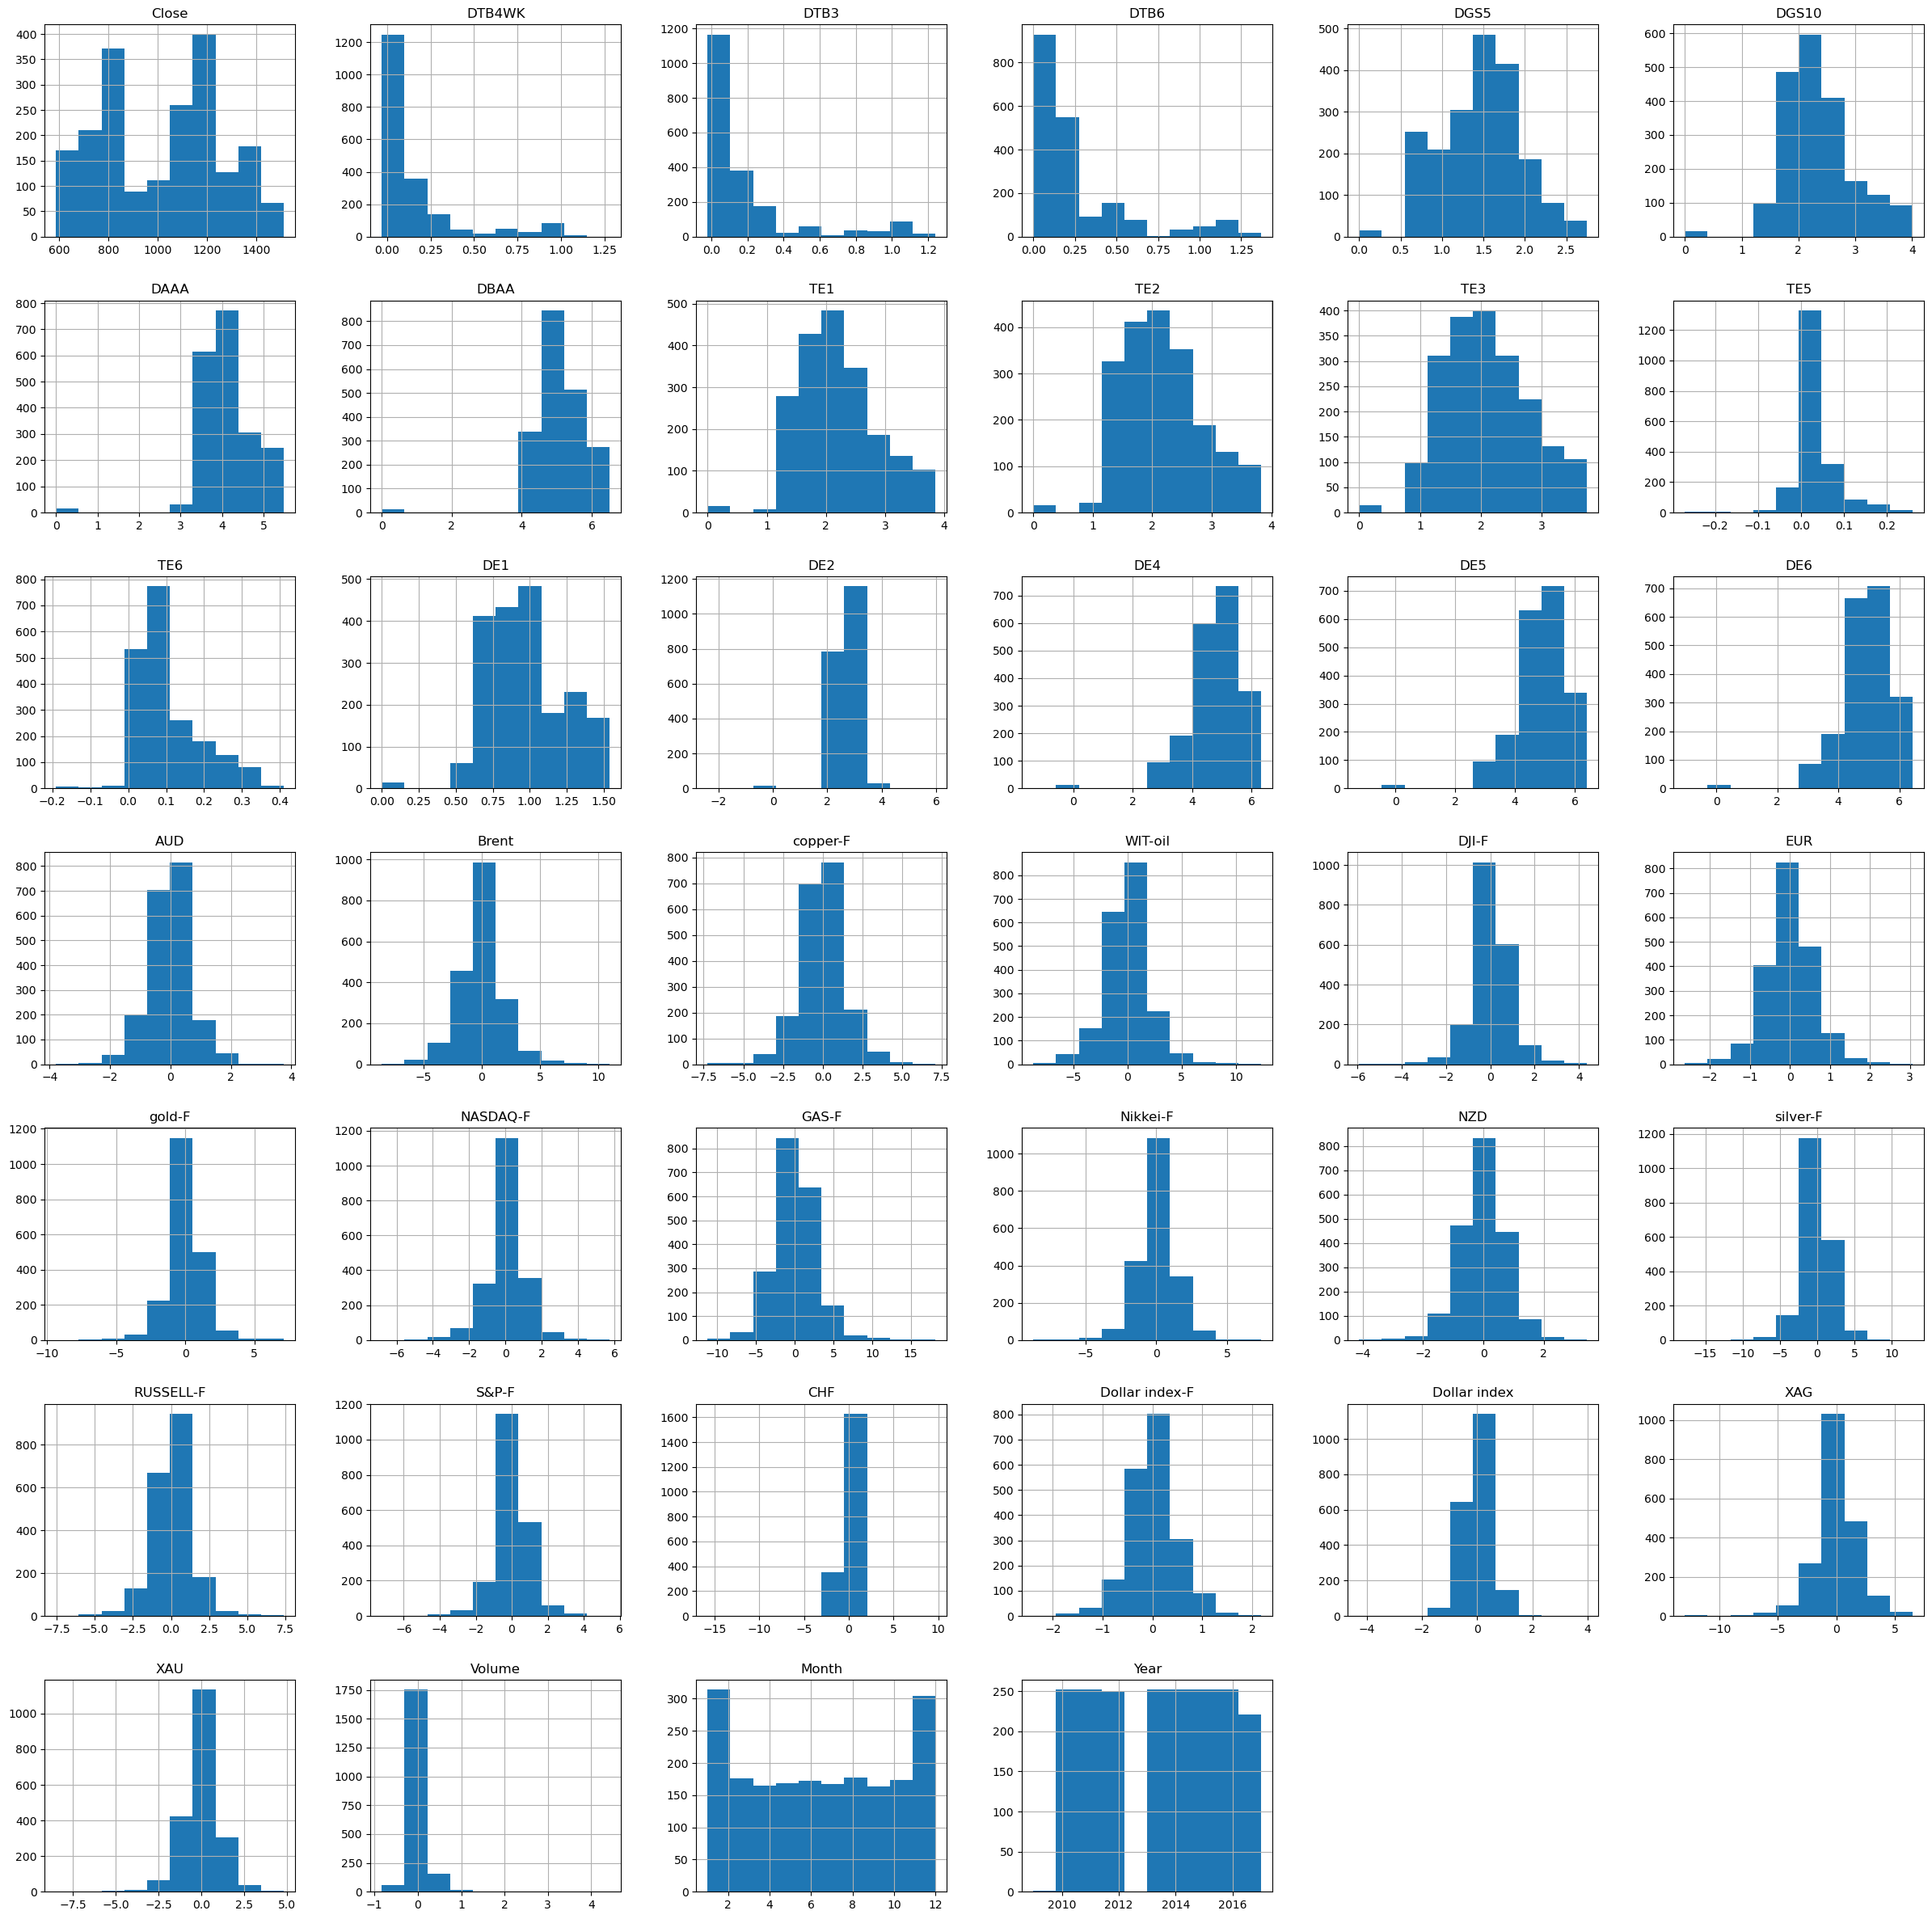

In [720]:
import matplotlib.pyplot as plt
df_clean1.hist(figsize=(30,30))
plt.show()

In [721]:
# Features (all columns except 'Close')
X = df_clean1.drop(columns=['Close'])

# Target variable (the 'Close' price)
y = df_clean1['Close']

In [722]:

from sklearn.model_selection import train_test_split

In [723]:
# Define the split point (e.g., 80% train, 20% test)
test_size = int(len(df_clean1) * 0.2)

# Split features
X_train = X.iloc[:-test_size]  # All rows except the last 30%
X_test = X.iloc[-test_size:]   # Last 30%

# Split target
y_train = y.iloc[:-test_size]
y_test = y.iloc[-test_size:]

In [724]:
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (1588, 40)
Testing data shape: (396, 40)


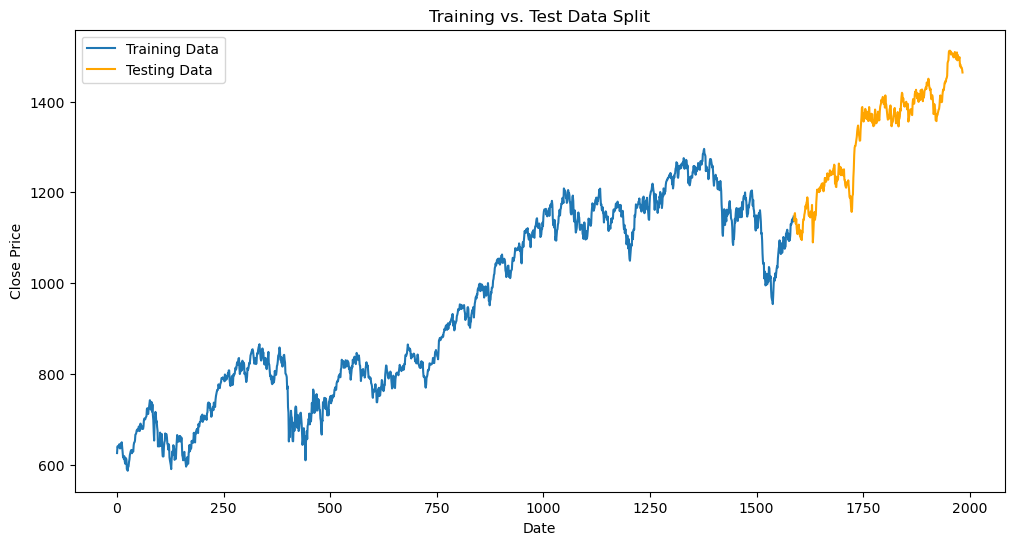

In [725]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_train.index, y_train, label='Training Data')
plt.plot(y_test.index, y_test, label='Testing Data', color='orange')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Training vs. Test Data Split')
plt.legend()
plt.show()

In [726]:
from sklearn.preprocessing import MinMaxScaler

###gfhdth

In [727]:
!pip install prophet

In [728]:
import prophet as fbp

In [729]:
!pip install xgboost
!pip install catboost


In [744]:
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

In [766]:
cat_features = ['Day']

In [768]:
# Train and evaluate XGBoost
from catboost import CatBoostRegressor

model = CatBoostRegressor()
model.fit(X_train, y_train, cat_features=cat_features)


Learning rate set to 0.044047
0:	learn: 195.4045839	total: 407ms	remaining: 6m 46s
1:	learn: 188.0057248	total: 492ms	remaining: 4m 5s
2:	learn: 180.5820435	total: 542ms	remaining: 2m 59s
3:	learn: 174.6376071	total: 580ms	remaining: 2m 24s
4:	learn: 168.2695169	total: 619ms	remaining: 2m 3s
5:	learn: 162.1977932	total: 710ms	remaining: 1m 57s
6:	learn: 156.2965153	total: 767ms	remaining: 1m 48s
7:	learn: 150.2850705	total: 804ms	remaining: 1m 39s
8:	learn: 144.7354291	total: 868ms	remaining: 1m 35s
9:	learn: 139.7257909	total: 938ms	remaining: 1m 32s
10:	learn: 134.8931806	total: 985ms	remaining: 1m 28s
11:	learn: 130.4198304	total: 1.06s	remaining: 1m 27s
12:	learn: 125.8057598	total: 1.11s	remaining: 1m 24s
13:	learn: 121.5141654	total: 1.15s	remaining: 1m 21s
14:	learn: 117.2981081	total: 1.22s	remaining: 1m 20s
15:	learn: 113.5004762	total: 1.27s	remaining: 1m 18s
16:	learn: 109.7958529	total: 1.31s	remaining: 1m 16s
17:	learn: 106.5980559	total: 1.43s	remaining: 1m 18s
18:	learn:

In [780]:
y_pred = model.predict(X_test)


In [782]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))
 

MSE: 50989.79882969535
MAE: 199.77950629348888
R² Score: -3.1382544486135133
